In [47]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Обработка данных

In [48]:
df = pd.read_csv('../data/extention_ZAlizadeh_san_preprocessed.csv')

In [49]:
del df['Unnamed: 0']

In [50]:
df.head(10)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,39,52,261,50,0,2,1,0,1,0
1,67,70,157,2,28.398718,0,1,0,0,0,...,38,55,165,40,4,2,1,1,0,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,38,60,230,40,2,0,1,0,0,0
3,66,67,158,2,26.838648,0,1,0,0,0,...,18,72,742,55,0,3,0,0,0,1
4,50,87,153,2,37.165193,0,1,0,0,0,...,55,39,274,50,0,3,0,0,0,1
5,50,75,175,1,24.489796,0,0,1,0,0,...,26,66,194,50,0,2,1,1,1,0
6,55,80,165,1,29.384757,0,0,0,1,0,...,58,33,292,40,4,0,1,0,0,0
7,72,80,175,1,26.122449,1,0,1,0,0,...,25,74,410,45,4,0,1,1,1,0
8,58,84,163,2,31.615793,0,0,0,0,0,...,49,50,370,50,0,2,0,0,0,1
9,60,71,170,1,24.567474,1,0,0,0,0,...,55,42,380,40,2,2,0,1,1,0


In [51]:
X = df.iloc[:,:26].values
y = df.iloc[:,27].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Работа с сетью

In [54]:
model = Sequential()
model.add(Dense(26, input_dim=26, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 27        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________
None


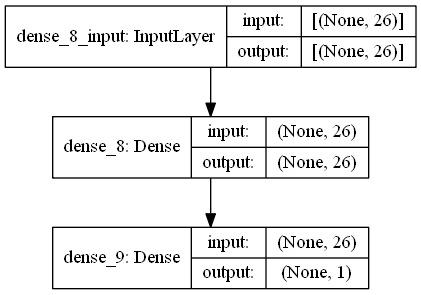

In [56]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [77]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [78]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 [==============================] - 0s 1000us/step - loss: 2.6061e-05 - accuracy: 1.0000
Epoch 2/250
7/7 [==============================] - 0s 1000us/step - loss: 1.5321e-05 - accuracy: 1.0000
Epoch 3/250
7/7 [==============================] - 0s 1ms/step - loss: 1.8587e-05 - accuracy: 1.0000
Epoch 4/250
7/7 [==============================] - 0s 1ms/step - loss: 1.9078e-05 - accuracy: 1.0000
Epoch 5/250
7/7 [==============================] - 0s 1ms/step - loss: 1.9805e-05 - accuracy: 1.0000
Epoch 6/250
7/7 [==============================] - 0s 1000us/step - loss: 1.6860e-05 - accuracy: 1.0000
Epoch 7/250
7/7 [==============================] - 0s 1ms/step - loss: 1.7763e-05 - accuracy: 1.0000
Epoch 8/250
7/7 [==============================] - 0s 1ms/step - loss: 2.1489e-05 - accuracy: 1.0000
Epoch 9/250
7/7 [==============================] - 0s 833us/step - loss: 2.7337e-05 - accuracy: 1.0000
Epoch 10/250
7/7 [==============================] - 0s 1ms/step - loss: 2.3580e-

7/7 [==============================] - 0s 1ms/step - loss: 5.3736e-06 - accuracy: 1.0000
Epoch 81/250
7/7 [==============================] - 0s 1000us/step - loss: 3.8767e-06 - accuracy: 1.0000
Epoch 82/250
7/7 [==============================] - 0s 1000us/step - loss: 4.1405e-06 - accuracy: 1.0000
Epoch 83/250
7/7 [==============================] - 0s 1ms/step - loss: 5.1553e-06 - accuracy: 1.0000
Epoch 84/250
7/7 [==============================] - 0s 1ms/step - loss: 4.9929e-06 - accuracy: 1.0000
Epoch 85/250
7/7 [==============================] - 0s 1ms/step - loss: 5.5355e-06 - accuracy: 1.0000
Epoch 86/250
7/7 [==============================] - 0s 1000us/step - loss: 3.7603e-06 - accuracy: 1.0000
Epoch 87/250
7/7 [==============================] - 0s 1000us/step - loss: 5.2114e-06 - accuracy: 1.0000
Epoch 88/250
7/7 [==============================] - 0s 833us/step - loss: 3.7094e-06 - accuracy: 1.0000
Epoch 89/250
7/7 [==============================] - 0s 1000us/step - loss: 5.4540

7/7 [==============================] - 0s 1000us/step - loss: 1.3072e-06 - accuracy: 1.0000
Epoch 158/250
7/7 [==============================] - 0s 1ms/step - loss: 1.3609e-06 - accuracy: 1.0000
Epoch 159/250
7/7 [==============================] - 0s 1000us/step - loss: 2.3599e-06 - accuracy: 1.0000
Epoch 160/250
7/7 [==============================] - 0s 833us/step - loss: 1.9424e-06 - accuracy: 1.0000
Epoch 161/250
7/7 [==============================] - 0s 1000us/step - loss: 1.7146e-06 - accuracy: 1.0000
Epoch 162/250
7/7 [==============================] - 0s 1000us/step - loss: 1.8075e-06 - accuracy: 1.0000
Epoch 163/250
7/7 [==============================] - 0s 833us/step - loss: 2.5323e-06 - accuracy: 1.0000
Epoch 164/250
7/7 [==============================] - 0s 1000us/step - loss: 1.2060e-06 - accuracy: 1.0000
Epoch 165/250
7/7 [==============================] - 0s 1000us/step - loss: 1.8830e-06 - accuracy: 1.0000
Epoch 166/250
7/7 [==============================] - 0s 1ms/step 

7/7 [==============================] - 0s 917us/step - loss: 8.9421e-07 - accuracy: 1.0000
Epoch 236/250
7/7 [==============================] - 0s 833us/step - loss: 8.5934e-07 - accuracy: 1.0000
Epoch 237/250
7/7 [==============================] - 0s 1ms/step - loss: 5.1678e-07 - accuracy: 1.0000
Epoch 238/250
7/7 [==============================] - 0s 1000us/step - loss: 5.0205e-07 - accuracy: 1.0000
Epoch 239/250
7/7 [==============================] - 0s 1ms/step - loss: 1.2474e-06 - accuracy: 1.0000
Epoch 240/250
7/7 [==============================] - 0s 833us/step - loss: 1.0005e-06 - accuracy: 1.0000
Epoch 241/250
7/7 [==============================] - 0s 1ms/step - loss: 7.9807e-07 - accuracy: 1.0000
Epoch 242/250
7/7 [==============================] - 0s 833us/step - loss: 8.6252e-07 - accuracy: 1.0000
Epoch 243/250
7/7 [==============================] - 0s 970us/step - loss: 7.2393e-07 - accuracy: 1.0000
Epoch 244/250
7/7 [==============================] - 0s 833us/step - loss:

In [79]:
y_pred = model.predict(X_test)
for i in range(10):
	print('%s -> %d (expected %d)' % (X[i].tolist(), y_pred[i], y[i]))

[53.0, 90.0, 175.0, 1.0, 29.387755100000003, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 110.0, 80.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] -> 0 (expected 0)
[67.0, 70.0, 157.0, 2.0, 28.398718, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 140.0, 80.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] -> 0 (expected 0)
[54.0, 54.0, 164.0, 1.0, 20.07733492, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] -> 0 (expected 0)
[66.0, 67.0, 158.0, 2.0, 26.83864765, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 80.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0] -> 0 (expected 0)
[50.0, 87.0, 153.0, 2.0, 37.16519287, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 110.0, 80.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0] -> 0 (expected 0)
[50.0, 75.0, 175.0, 1.0, 24.48979592, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 118.0, 70.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] -> 0 (expected 0)
[55.0, 80.

In [75]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % (accuracy*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.8242
Accuracy: 82.418


# Сохранение модели

In [72]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets
